<h1>Indonesia population with formal basic education and gap education</h1>
<h2>Attribute Information</h2>

*   Entity: The countries or Continent or Specific locations .
*   Code: Code of the countries.Continent or Specific locations doesn't have a code.
*   Year : Years in the Data.
*   Share of population with no education: No education
*   Share of population with at least some basic education:Basic education

<h2>Importing</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("World-population-with-at-least-basic-education.csv")
data1 = pd.read_csv("3- number-of-out-of-school-children.csv")

<H2>Data exploration</h2>

In [3]:
data.columns

Index(['Entity', 'Code', 'Year', 'Share of population with no education',
       'Share of population with at least some basic education'],
      dtype='object')

In [4]:
data1.columns

Index(['Entity', 'Code', 'Year',
       'Out-of-school children, adolescents and youth of primary and secondary school age, male (number)',
       'Out-of-school children, adolescents and youth of primary and secondary school age, female (number)'],
      dtype='object')

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,815.0,2023.570552,46.654142,1820.000000,1985.000000,2025.000000,2065.000000,2100.00000
Share of population with no education,815.0,9.586013,17.986483,0.000000,0.106413,1.077521,8.714098,88.11312
Share of population with at least some basic education,815.0,90.413987,17.986483,11.886879,91.285905,98.922480,99.893589,100.00000


In [6]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2580.0,2.004388e+03,1.169594e+01,1970.0,2000.0,2007.0,2013.0,2019.0
"Out-of-school children, adolescents and youth of primary and secondary school age, male (number)",2577.0,6.412909e+06,2.314300e+07,14.0,14768.0,123213.0,1084688.0,173470800.0
"Out-of-school children, adolescents and youth of primary and secondary school age, female (number)",2577.0,7.553630e+06,2.773425e+07,33.0,11505.0,102785.0,1127516.0,212182350.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Entity                                                  815 non-null    object 
 1   Code                                                    815 non-null    object 
 2   Year                                                    815 non-null    int64  
 3   Share of population with no education                   815 non-null    float64
 4   Share of population with at least some basic education  815 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 32.0+ KB


In [8]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
810    False
811    False
812    False
813    False
814    False
Length: 815, dtype: bool

In [9]:
data.isna().sum()

Entity                                                    0
Code                                                      0
Year                                                      0
Share of population with no education                     0
Share of population with at least some basic education    0
dtype: int64

<div class="alert alert-block alert-info"> 
<b>Info:</b> I think data was clean. 
</div>

In [10]:
data.rename(columns={
    'Share of population with no education': 'No Formal Edu',
    'Share of population with at least some basic education': 'Some Formal Edu',
}, inplace=True)

In [11]:
data.columns

Index(['Entity', 'Code', 'Year', 'No Formal Edu', 'Some Formal Edu'], dtype='object')

fix data1

In [12]:
data1.rename(columns={
    'Out-of-school children, adolescents and youth of primary and secondary school age, male (number)': 'Out-of-school children male',
    'Out-of-school children, adolescents and youth of primary and secondary school age, female (number)': 'Out-of-school children famale',
}, inplace=True)

In [13]:
data1

,Entity,Code,Year,Out-of-school children male,Out-of-school children famale
0,Albania,ALB,2000,78614.0,81341.0
1,Albania,ALB,2001,77837.0,78849.0
2,Albania,ALB,2013,27879.0,21727.0
3,Albania,ALB,2014,21542.0,16571.0
4,Albania,ALB,2015,18407.0,13250.0
...,...,...,...,...,...
2575,Zimbabwe,ZWE,2001,386981.0,474012.0
2576,Zimbabwe,ZWE,2002,462514.0,550123.0
2577,Zimbabwe,ZWE,2003,522317.0,600606.0
2578,Zimbabwe,ZWE,2012,284958.0,333954.0


I just renamed the column to make it easier to use.

<h2>Data visualisasi</h2>

In [ ]:
selected_entities = ['Indonesia', 'China', 'India']
filtered_data = data[data['Entity'].isin(selected_entities)]

selected_entities1 = ['Indonesia', 'Malaysia']
filtered_data1 = data1[data1['Entity'].isin(selected_entities1)]

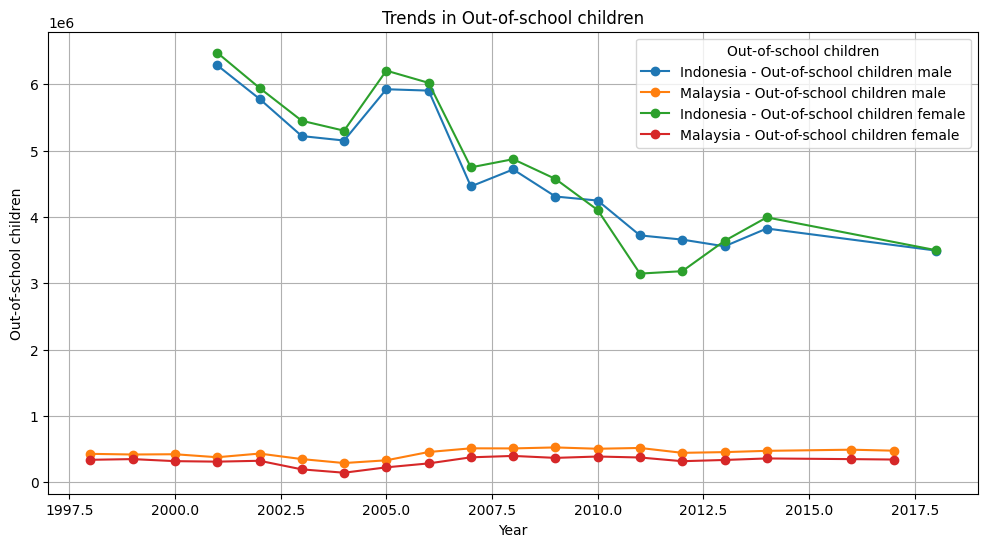

In [ ]:
plt.figure(figsize=(12,6))

for entity in selected_entities1:  
    entity_data = filtered_data1[filtered_data1['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Out-of-school children male'], label=f'{entity} - Out-of-school children male', marker='o')

for entity in selected_entities1:  
    entity_data = filtered_data1[filtered_data1['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Out-of-school children famale'], label=f'{entity} - Out-of-school children female', marker='o')


plt.xlabel('Year')
plt.ylabel('Out-of-school children')  
plt.title('Trends in Out-of-school children')
plt.legend(title='Out-of-school children')
plt.grid(True)
plt.show() 


The chart clearly shows that Indonesia has made substantial progress in reducing the number of out-of-school children, both male and female, particularly from 2000 to 2010.

Malaysia consistently maintains a very low number of out-of-school children throughout the period, for both boys and girls. This suggests a strong education system and high enrollment rates.

In the earlier years (around 2000), there's a noticeable difference between the number of out-of-school boys and girls in Indonesia, with more boys out of school. This gap narrows significantly over time.

The number of out-of-school children in Malaysia remains relatively stable and low throughout the entire period, indicating a well-established and consistent education system.

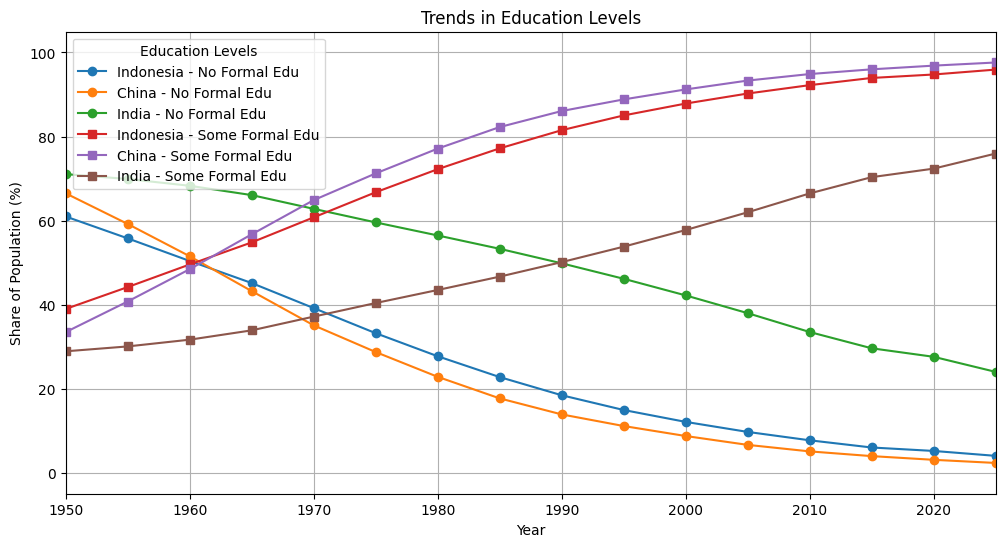

In [ ]:

plt.figure(figsize=(12, 6))

# Plotting No Formal Edu trends
for entity in selected_entities:
    entity_data = filtered_data[filtered_data['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['No Formal Edu'], label=f'{entity} - No Formal Edu', marker='o')

# Plotting Some Formal Edu trends
for entity in selected_entities:
    entity_data = filtered_data[filtered_data['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Some Formal Edu'], label=f'{entity} - Some Formal Edu', marker='s')

plt.xlabel('Year')
plt.ylabel('Share of Population (%)')
plt.title('Trends in Education Levels')  
plt.legend(title='Education Levels')
plt.grid(True)

plt.xlim(filtered_data['Year'].min(), 2025) 

plt.show()

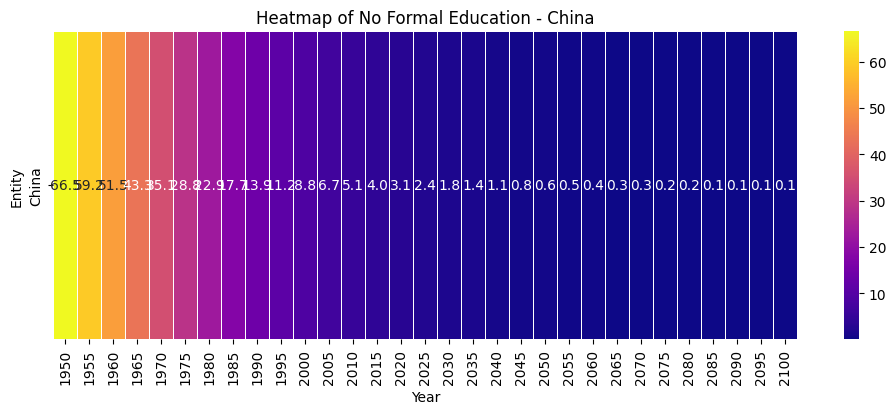

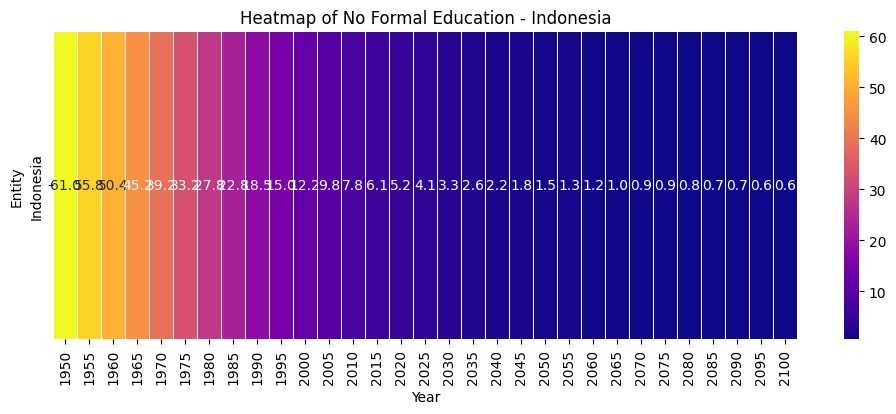

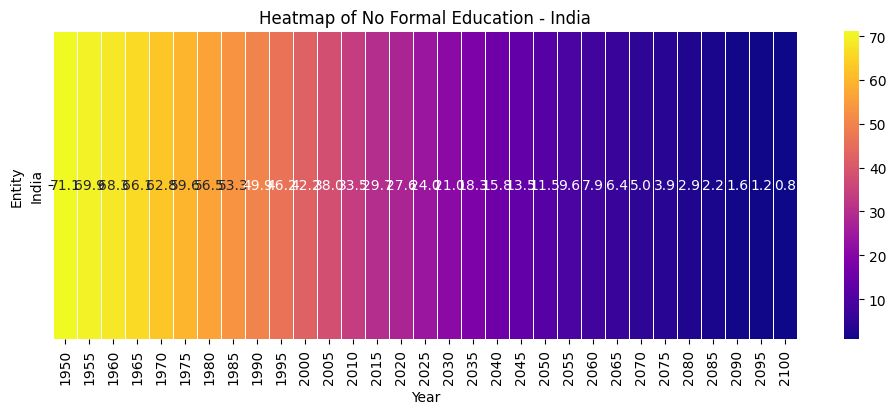

In [ ]:
# Buat heatmap_data dari data yang difilter
heatmap_data = filtered_data.pivot(index='Entity', columns='Year', values='No Formal Edu')

# Heatmap untuk China
plt.figure(figsize=(12, 4))  # Ukuran disesuaikan
sns.heatmap(heatmap_data.loc[['China']], annot=True, fmt=".1f", cmap="plasma", linewidths=.5)
plt.title('Heatmap of No Formal Education - China')
plt.show()

# Heatmap untuk Indonesia
plt.figure(figsize=(12, 4))  # Ukuran disesuaikan
sns.heatmap(heatmap_data.loc[['Indonesia']], annot=True, fmt=".1f", cmap="plasma", linewidths=.5)
plt.title('Heatmap of No Formal Education - Indonesia')
plt.show()

# Heatmap untuk Indonesia
plt.figure(figsize=(12, 4))  # Ukuran disesuaikan
sns.heatmap(heatmap_data.loc[['India']], annot=True, fmt=".1f", cmap="plasma", linewidths=.5)
plt.title('Heatmap of No Formal Education - India')
plt.show()


conculusion :
Based on the information above, Indonesia showed considerable improvement in formal education between 1970 and 2000. However, Indonesia still had a higher number of out-of-school children, both male and female, from 2012 to the present. In comparison, Malaysia consistently maintained a very low number of out-of-school children throughout the period for both boys and girls. This suggests a strong education system and high enrollment rates in Malaysia.